In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
from datetime import datetime
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import statsmodels as smt



start_date = datetime(2021,1,1)
end_date = datetime(2022,1,31)
Visa = yf.download('V',start_date ,end_date,index=False)

[*********************100%***********************]  1 of 1 completed


In [3]:
Visa.reset_index(inplace=True)
Visa

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,220.250000,220.250000,214.240005,217.759995,216.078995,10318300
1,2021-01-05,216.309998,218.460007,213.639999,214.509995,212.854080,6869700
2,2021-01-06,213.800003,216.169998,212.070007,212.619995,210.978638,7206200
3,2021-01-07,212.199997,215.220001,212.199997,213.809998,212.159470,10967900
4,2021-01-08,214.169998,216.119995,212.750000,215.449997,213.786819,6513000
...,...,...,...,...,...,...,...
266,2022-01-24,202.179993,202.720001,195.649994,201.850006,201.522141,16054000
267,2022-01-25,199.619995,205.380005,196.990005,202.000000,201.671890,12125500
268,2022-01-26,204.279999,210.860001,203.669998,205.869995,205.535599,10817600
269,2022-01-27,209.500000,210.960007,205.850006,206.149994,205.815140,12009800


In [4]:
df = pd.read_csv('F-F_Research_Data_Factors_daily.csv',skiprows=4)
df

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.23,-0.28,0.009
1,19260702,0.45,-0.34,-0.03,0.009
2,19260706,0.17,0.29,-0.38,0.009
3,19260707,0.09,-0.59,0.00,0.009
4,19260708,0.21,-0.38,0.18,0.009
...,...,...,...,...,...
25164,20220126,-0.30,-1.08,0.09,0.000
25165,20220127,-0.78,-1.63,0.77,0.000
25166,20220128,2.45,-0.15,-2.07,0.000
25167,20220131,2.33,1.29,-2.86,0.000


In [5]:
df.rename(columns = {'Unnamed: 0':'Date'},inplace=True)

In [6]:
df=df[:-1]

In [7]:
df['Date']=pd.to_datetime(df['Date'])

<ipython-input-7-182e23b44254>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'])


In [8]:
df

,Date,Mkt-RF,SMB,HML,RF
0,1926-07-01,0.10,-0.23,-0.28,0.009
1,1926-07-02,0.45,-0.34,-0.03,0.009
2,1926-07-06,0.17,0.29,-0.38,0.009
3,1926-07-07,0.09,-0.59,0.00,0.009
4,1926-07-08,0.21,-0.38,0.18,0.009
...,...,...,...,...,...
25163,2022-01-25,-1.43,-0.60,2.79,0.000
25164,2022-01-26,-0.30,-1.08,0.09,0.000
25165,2022-01-27,-0.78,-1.63,0.77,0.000
25166,2022-01-28,2.45,-0.15,-2.07,0.000


In [9]:
Visa.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [10]:
df_final = Visa.merge(df, how='left', on='Date')

In [11]:
df_final

,Date,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,RF
0,2021-01-04,220.250000,220.250000,214.240005,217.759995,216.078995,10318300,-1.41,0.22,0.57,0.0
1,2021-01-05,216.309998,218.460007,213.639999,214.509995,212.854080,6869700,0.86,1.21,0.50,0.0
2,2021-01-06,213.800003,216.169998,212.070007,212.619995,210.978638,7206200,0.79,2.13,3.96,0.0
3,2021-01-07,212.199997,215.220001,212.199997,213.809998,212.159470,10967900,1.76,0.32,-0.86,0.0
4,2021-01-08,214.169998,216.119995,212.750000,215.449997,213.786819,6513000,0.51,-0.75,-1.38,0.0
...,...,...,...,...,...,...,...,...,...,...,...
266,2022-01-24,202.179993,202.720001,195.649994,201.850006,201.522141,16054000,0.53,1.81,-0.28,0.0
267,2022-01-25,199.619995,205.380005,196.990005,202.000000,201.671890,12125500,-1.43,-0.60,2.79,0.0
268,2022-01-26,204.279999,210.860001,203.669998,205.869995,205.535599,10817600,-0.30,-1.08,0.09,0.0
269,2022-01-27,209.500000,210.960007,205.850006,206.149994,205.815140,12009800,-0.78,-1.63,0.77,0.0


In [12]:
df_final.set_index(df_final['Date'], inplace=True) 

In [13]:
df_final['y-1']=df_final['Adj Close'].shift(periods=1)
df_final['y-2']=df_final['Adj Close'].shift(periods=2)
df_final['y-3']=df_final['Adj Close'].shift(periods=3)

In [14]:
df_final

,Date,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,RF,y-1,y-2,y-3
Date,,,,,,,,,,,,,,
2021-01-04,2021-01-04,220.250000,220.250000,214.240005,217.759995,216.078995,10318300,-1.41,0.22,0.57,0.0,NaN,NaN,NaN
2021-01-05,2021-01-05,216.309998,218.460007,213.639999,214.509995,212.854080,6869700,0.86,1.21,0.50,0.0,216.078995,NaN,NaN
2021-01-06,2021-01-06,213.800003,216.169998,212.070007,212.619995,210.978638,7206200,0.79,2.13,3.96,0.0,212.854080,216.078995,NaN
2021-01-07,2021-01-07,212.199997,215.220001,212.199997,213.809998,212.159470,10967900,1.76,0.32,-0.86,0.0,210.978638,212.854080,216.078995
2021-01-08,2021-01-08,214.169998,216.119995,212.750000,215.449997,213.786819,6513000,0.51,-0.75,-1.38,0.0,212.159470,210.978638,212.854080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,2022-01-24,202.179993,202.720001,195.649994,201.850006,201.522141,16054000,0.53,1.81,-0.28,0.0,205.595505,214.001846,214.331284
2022-01-25,2022-01-25,199.619995,205.380005,196.990005,202.000000,201.671890,12125500,-1.43,-0.60,2.79,0.0,201.522141,205.595505,214.001846
2022-01-26,2022-01-26,204.279999,210.860001,203.669998,205.869995,205.535599,10817600,-0.30,-1.08,0.09,0.0,201.671890,201.522141,205.595505


In [15]:
# df_final['Daily_Rtn'] = df_final['Adj Close'].resample('D').last().pct_change().dropna()

In [16]:
df_final=df_final[3:]
df_final

,Date,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,RF,y-1,y-2,y-3
Date,,,,,,,,,,,,,,
2021-01-07,2021-01-07,212.199997,215.220001,212.199997,213.809998,212.159470,10967900,1.76,0.32,-0.86,0.0,210.978638,212.854080,216.078995
2021-01-08,2021-01-08,214.169998,216.119995,212.750000,215.449997,213.786819,6513000,0.51,-0.75,-1.38,0.0,212.159470,210.978638,212.854080
2021-01-11,2021-01-11,213.960007,214.860001,212.479996,212.889999,211.246582,7353100,-0.51,0.25,1.24,0.0,213.786819,212.159470,210.978638
2021-01-12,2021-01-12,212.339996,212.789993,207.470001,208.860001,207.247711,9331600,0.38,1.29,1.24,0.0,211.246582,213.786819,212.159470
2021-01-13,2021-01-13,209.410004,211.000000,208.630005,209.350006,207.733902,6688500,0.07,-0.95,-0.43,0.0,207.247711,211.246582,213.786819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,2022-01-24,202.179993,202.720001,195.649994,201.850006,201.522141,16054000,0.53,1.81,-0.28,0.0,205.595505,214.001846,214.331284
2022-01-25,2022-01-25,199.619995,205.380005,196.990005,202.000000,201.671890,12125500,-1.43,-0.60,2.79,0.0,201.522141,205.595505,214.001846
2022-01-26,2022-01-26,204.279999,210.860001,203.669998,205.869995,205.535599,10817600,-0.30,-1.08,0.09,0.0,201.671890,201.522141,205.595505


In [17]:
X = df_final[['y-1', 'y-2', 'y-3']]
y = df_final['Adj Close']
X = sm.add_constant(X)
ff_model = sm.OLS(y.head(178), X.head(178)).fit()
print(ff_model.summary())
intercept, b1, b2, b3 = ff_model.params

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1086.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):          2.16e-112
Time:                        20:41:06   Log-Likelihood:                -440.41
No. Observations:                 178   AIC:                             888.8
Df Residuals:                     174   BIC:                             901.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0578      3.856      1.571      0.1

In [18]:
y_hat = ff_model.predict(X[:90])
y_hat

Date
2021-01-07    211.510738
2021-01-08    212.570349
2021-01-11    214.033530
2021-01-12    211.597727
2021-01-13    207.881347
                 ...    
2021-05-11    224.643270
2021-05-12    224.357306
2021-05-13    219.510634
2021-05-14    222.890775
2021-05-17    225.683773
Length: 90, dtype: float64

In [19]:
X

,const,y-1,y-2,y-3
Date,,,,
2021-01-07,1.0,210.978638,212.854080,216.078995
2021-01-08,1.0,212.159470,210.978638,212.854080
2021-01-11,1.0,213.786819,212.159470,210.978638
2021-01-12,1.0,211.246582,213.786819,212.159470
2021-01-13,1.0,207.247711,211.246582,213.786819
...,...,...,...,...
2022-01-24,1.0,205.595505,214.001846,214.331284
2022-01-25,1.0,201.522141,205.595505,214.001846
2022-01-26,1.0,201.671890,201.522141,205.595505


In [20]:
y

Date
2021-01-07    212.159470
2021-01-08    213.786819
2021-01-11    211.246582
2021-01-12    207.247711
2021-01-13    207.733902
                 ...    
2022-01-24    201.522141
2022-01-25    201.671890
2022-01-26    205.535599
2022-01-27    205.815140
2022-01-28    227.629669
Name: Adj Close, Length: 268, dtype: float64

In [21]:
ff_model.params

const    6.057788
y-1      0.960423
y-2     -0.024849
y-3      0.037549
dtype: float64

In [22]:
pred = pd.DataFrame(y_hat)

In [23]:
y_pred = pred.values.reshape(-1,1)
y_pred.shape

(90, 1)

In [24]:
y_hat.reset_index()
y_hat

Date
2021-01-07    211.510738
2021-01-08    212.570349
2021-01-11    214.033530
2021-01-12    211.597727
2021-01-13    207.881347
                 ...    
2021-05-11    224.643270
2021-05-12    224.357306
2021-05-13    219.510634
2021-05-14    222.890775
2021-05-17    225.683773
Length: 90, dtype: float64

In [25]:
y_hat.values

array([211.51073826, 212.57034894, 214.03353016, 211.59772738,
       207.88134734, 208.35228316, 201.05201692, 200.99763225,
       200.79196045, 204.92574977, 203.99199839, 201.20212045,
       200.25551278, 201.14650793, 194.37317532, 197.6824089 ,
       192.60352317, 197.71702678, 201.45615621, 200.3504715 ,
       208.05889471, 207.36033438, 205.87447857, 205.55036884,
       205.4131805 , 209.73474809, 208.95151617, 207.17194401,
       206.82446264, 208.51347734, 204.04375332, 207.65313235,
       211.00955894, 218.03679673, 212.57593266, 211.69129174,
       215.55995478, 214.5836158 , 213.88495613, 210.67803168,
       214.45847672, 218.87573584, 218.98752851, 221.84877465,
       224.6271065 , 222.94984657, 222.06486021, 223.38989515,
       221.71036656, 219.55264355, 206.41444398, 207.7161425 ,
       207.31866266, 207.27966997, 207.19178021, 212.4982278 ,
       213.29257931, 210.98464346, 210.92341059, 215.72673494,
       217.67449162, 217.43982513, 218.12260119, 219.45

In [26]:
y_hat = pd.DataFrame(y_hat.values)
y_hat

,0
0,211.510738
1,212.570349
2,214.033530
3,211.597727
4,207.881347
...,...
85,224.643270
86,224.357306
87,219.510634
88,222.890775


In [27]:
y_pred = y[:90].reset_index()
y_pred

,Date,Adj Close
0,2021-01-07,212.159470
1,2021-01-08,213.786819
2,2021-01-11,211.246582
3,2021-01-12,207.247711
4,2021-01-13,207.733902
...,...,...
85,2021-05-11,224.086746
86,2021-05-12,219.266708
87,2021-05-13,222.680466
88,2021-05-14,225.865326


In [28]:
act = pd.DataFrame(y[:90])

In [29]:
act = act.reset_index()
act

,Date,Adj Close
0,2021-01-07,212.159470
1,2021-01-08,213.786819
2,2021-01-11,211.246582
3,2021-01-12,207.247711
4,2021-01-13,207.733902
...,...,...
85,2021-05-11,224.086746
86,2021-05-12,219.266708
87,2021-05-13,222.680466
88,2021-05-14,225.865326


In [30]:
act.drop(columns=['Date'], inplace = True)
act

,Adj Close
0,212.159470
1,213.786819
2,211.246582
3,207.247711
4,207.733902
...,...
85,224.086746
86,219.266708
87,222.680466
88,225.865326


In [31]:
y_pred.drop(columns=['Date'], inplace = True)
y_pred

,Adj Close
0,212.159470
1,213.786819
2,211.246582
3,207.247711
4,207.733902
...,...
85,224.086746
86,219.266708
87,222.680466
88,225.865326


In [32]:
act

,Adj Close
0,212.159470
1,213.786819
2,211.246582
3,207.247711
4,207.733902
...,...
85,224.086746
86,219.266708
87,222.680466
88,225.865326


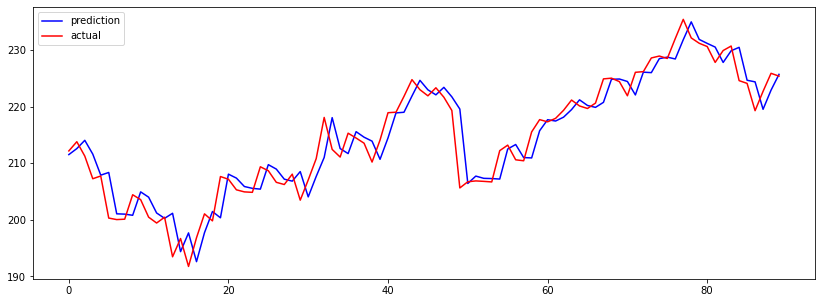

In [33]:
fig= plt.figure(figsize=(14,5))
plt.plot(y_hat, color='blue', label='prediction')
plt.plot(act, color = 'red', label = 'actual')
plt.legend(loc = 'upper left')
plt.show()
pred = pd.DataFrame(y_hat)